In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # type: ignore
import numpy as np
import matplotlib.pyplot as plt

In [28]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [29]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [30]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [31]:
def plotting(x,y,index):
    plt.figure(figsize=(12,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

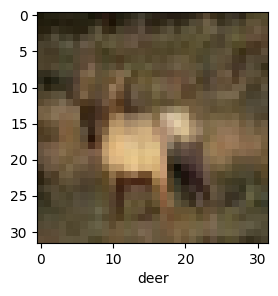

In [32]:
plotting(x_train,y_train,3)

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3),activation ='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

C:\Users\styli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8106 - loss: 0.5384
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8208 - loss: 0.5103
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8343 - loss: 0.4784
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8438 - loss: 0.4442
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8508 - loss: 0.4213
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8545 - loss: 0.4090
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8668 - loss: 0.3783
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8773 - loss: 0.3517
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8814 - loss: 0.3339
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8910 - loss: 0.3066


In [24]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6889 - loss: 1.2588


[1.286730408668518, 0.6865000128746033]

In [36]:
prediction = cnn.predict(x_test)
pred= [np.argmax(i) for i in prediction]
print(pred[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[np.int64(4), np.int64(4), np.int64(0), np.int64(7), np.int64(3)]


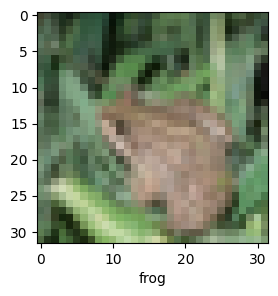

In [37]:
plotting(x_test,y_test,4)

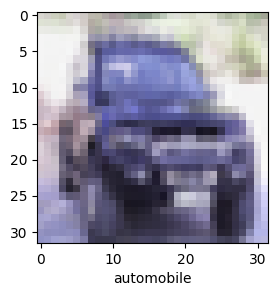

In [39]:
plotting(x_test,y_test,9)

In [40]:
train_loss, train_acc = cnn.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.1173
Test Accuracy: 0.1150
